# SUPPLEMENTAL FIGURES

# Fig S1 - AB_2 Monomer

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec
from matplotlib.markers import MarkerStyle
from matplotlib import ticker as mticker
from matplotlib.ticker import LogLocator, MultipleLocator
import glob
import re
from scipy.interpolate import griddata
from scipy.optimize import least_squares
from scipy.interpolate import interp1d 
from scipy.interpolate import interp2d 
import sys
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as path_effects
from matplotlib.colors import LogNorm
from scipy.interpolate import splrep, splev
from numpy import linalg as LA
import csv
import os
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.patches as patches

def exit(): 
    raise StopExecution

def colors(alpha):
    colors = [
    (0.0, 0.45, 0.7, alpha),   # Strong Blue
    (0.9, 0.6, 0.0, alpha),    # Bright Orange
    (0.0, 0.6, 0.5, alpha),    # Teal
    (0.8, 0.4, 0.0, alpha),    # Deep Orange
    (0.6, 0.3, 0.6, alpha),    # Purple
    (0.2, 0.8, 0.2, alpha),    # Bright Green
    (0.9, 0.9, 0.3, alpha),    # Yellow-Gold
    (0.35, 0.7, 0.9, alpha),   # Sky Blue
    (0.7, 0.2, 0.1, alpha),    # Reddish Brown
    (0.7, 0.6, 0.1, alpha)     # Olive Green
    ]
    return colors

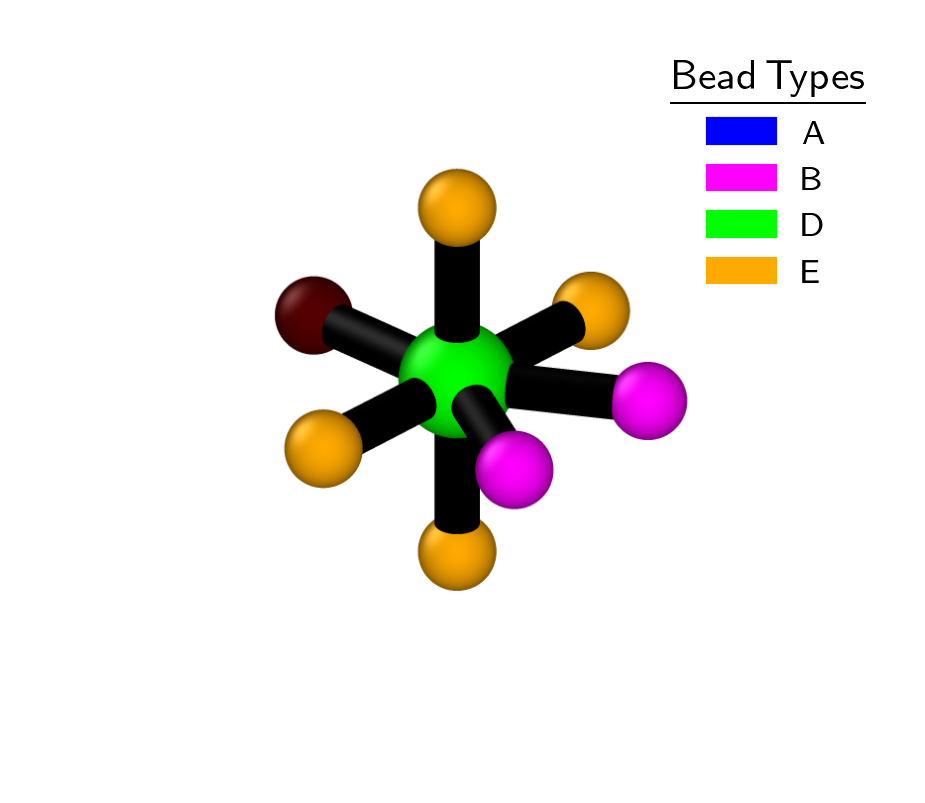

In [2]:
import matplotlib.patches as mpatches
import matplotlib.image as mpimg



#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.2
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=8,fancybox=False, framealpha=0.0,title_fontsize=10)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(1,1,  left=0.12 ,bottom=0.1, right=.97,top=.95)


ax=plt.subplot(gs1[0,0])


ax.axis('off')

alpha_pl_cl=0.3
alpha_cl=1
pl_cl=[(0, 0, 1,alpha_pl_cl),(0.004, 0.522, 0.039,alpha_pl_cl),(1, 0.659, 0,alpha_pl_cl),(0.314, 1, 1,alpha_pl_cl),
        (1, 0, 0,alpha_pl_cl),(0.329, 0.131, 0.0,alpha_pl_cl),(0.129, 0.349, 0.204,alpha_pl_cl),(0.471, 0.616, 0.71,alpha_pl_cl)]

cl=['#0000ff','#ff00ff','#00ff00','#ffaa00']
labels = ['A', 'B', 'D', 'E']
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(cl, labels)]
# Add the legend with the underlined title
legend = ax.legend(handles=patches, title=r"$\underline{\mathrm{ Bead \, Types}}$")

# Underline the title
# legend.get_title().set_fontweight('bold')  # Optionally make the title bold
# legend.get_title().set_underline(True)

# Load the image
image = mpimg.imread('Assisting_figures/ab_2_monomer_example.png')

# Display the image
ax.imshow(image)

# Show plot
plt.savefig("Supp_figures/ab_2_monomer_example.pdf")

# Fig  - Correletion between length and degree of branching

In [3]:
def read_molecule_data_into_columns(filename):
    molecules = {}  # Dictionary to hold data for each molecule
    
    current_molecule = None
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        
        for row in reader:
            # Strip any leading/trailing whitespace
            row = [r.strip() for r in row]
            
            if not row:  # Skip empty lines
                continue

            if row[0].startswith("Mol-"):  # Detect molecule entry (e.g., Mol-1, Mol-2)
                current_molecule = row[0]
                # Initialize 9 empty lists (one for each column)
                molecules[current_molecule] = {i: [] for i in range(9)}
            elif current_molecule is not None and len(row) >= 9:  # Ensure the row has at least 9 entries
                # Convert entries to integers and append them to the respective column
                try:
                    row_data = list(map(int, row[:9]))  # Only consider the first 9 columns
                    for i, val in enumerate(row_data):
                        molecules[current_molecule][i].append(val)  # Append to the appropriate column
                except ValueError:
                    continue  # If there's a conversion error, skip the row

    return molecules

def calculate_distribution(molecule_data):
    
    
    dendtitic_num=[]
    linear_num=[]
    terminal_num=[]
    #If you want to not include the linear part remove typ.count(-1) and add -data[1][typ==-1][0]  in tot_len
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0]
        tot_length=sum(data[1])-linear_seg_len
        dendtitic_num.append(typ.count(0)+1) 
        terminal_num.append(typ.count(1))  #+typ.count(-1)
        linear_num.append(tot_length-dendtitic_num[-1]-terminal_num[-1])

    dendtitic_num=np.array(dendtitic_num)
    linear_num=np.array(linear_num)
    terminal_num=np.array(terminal_num)

    db=2*dendtitic_num/(2*dendtitic_num+linear_num)

    return db

def calculate_length_distribution(molecule_data):
    
    
    lengths=[]
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0] #removing linear segment
        tot_length=sum(data[1])-linear_seg_len
        lengths.append(tot_length)
    
    

    return np.array(lengths)
pt_batch_topo = '../results/micelles/LHBC/dw_*/*3d/batch*/p*/c*/p*/analysis/hyperbranched_data/topology_data.dat'
pt_batch_weights = '../results/micelles/LHBC/dw_*/*3d/batch*/p*/c*/p*/analysis/hyperbranched_data/weights.dat'
pt_batch_micelle_weights = '../results/micelles/LHBC/dw_*/*3d/batch*/p*/c*/p*/analysis/new*/we*'

pt_all_topo = '../results/micelles/LHBC/dw_*/*/all_batch/p*/c*/p*/analysis/hyperbranched_data/topology_data.dat'
pt_all_weights = '../results/micelles/LHBC/dw_*/*/all_batch/p*/c*/p*/analysis/hyperbranched_data/weights.dat'
pt_all_micelle_weights = '../results/micelles/LHBC/dw_*/*/all_batch/p*/c*/p*/analysis/new*/we*'

filesbatchtopo = np.array(glob.glob(pt_batch_topo))
filesbatchoriweights = np.array(glob.glob(pt_batch_weights))
filesbatchmicweights = np.array(glob.glob(pt_batch_micelle_weights))

filesalltopo = np.array(glob.glob(pt_all_topo))
filesalloriweights = np.array(glob.glob(pt_all_weights))
filesallmicweights = np.array(glob.glob(pt_all_micelle_weights))

dws_batch = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesbatchtopo])
batches= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in filesbatchtopo])


dws_all = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesalltopo])




1.0
1.1
1.2
1.3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

1.4


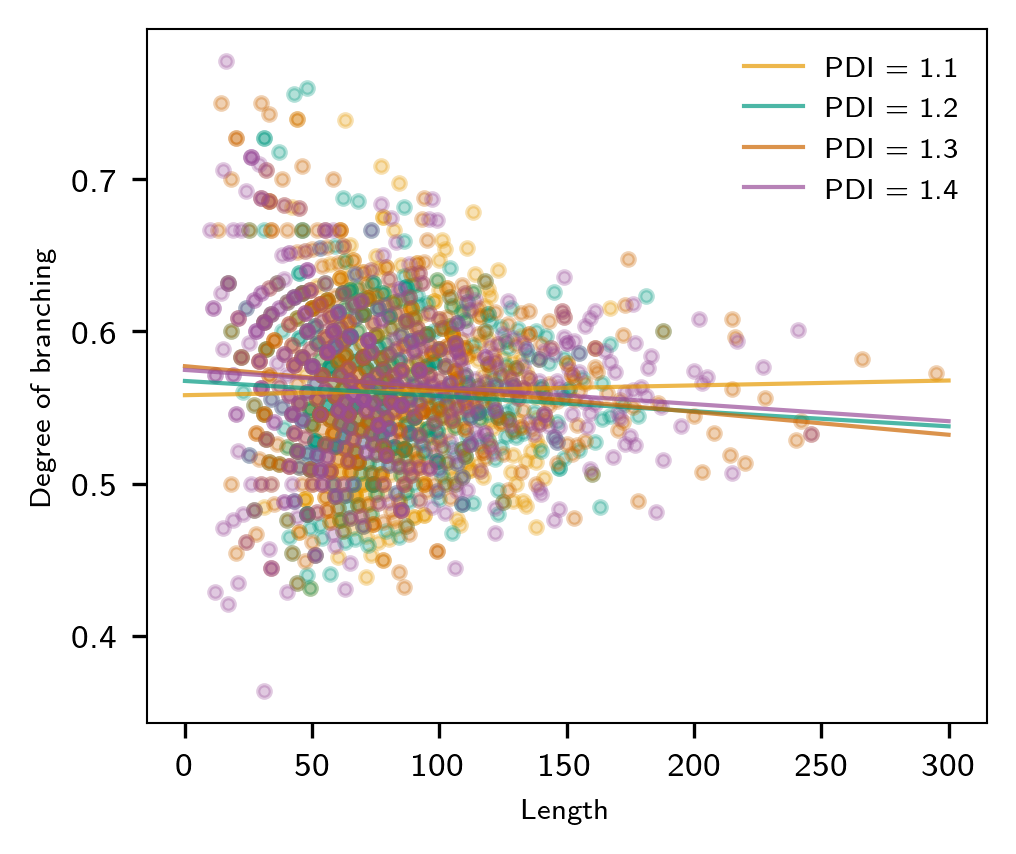

In [4]:
from sklearn.linear_model import LinearRegression

#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.4
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'


gs2=GridSpec(1,1,  left=0.17 ,bottom=0.065, right=.97,top=.99)
alpha_pl_cl=0.3
alpha_cl=0.7
pl_cl=colors(alpha_pl_cl)
cl=colors(alpha_cl)

ax=plt.subplot(gs2[0,0])




dw_chosen=[1.0,1.1,1.2,1.3,1.4]
batch_chosen=[1,2,3,4]

bins_db=np.arange(0.4,0.9,0.025)
bins_len=np.arange(0,320,10)
len_dw_all=[]
db_dw_all=[]

for i in range(0,len(dw_chosen)):
    
    dw=dw_chosen[i]

   

    filename=filesalltopo[dws_all==dw][0]
    molecule_data=read_molecule_data_into_columns(filename)
    dbs=calculate_distribution(molecule_data)
    lengths=calculate_length_distribution(molecule_data)
    len_dw_all.append(lengths)
    db_dw_all.append(dbs)

    
    fil=filesalloriweights[dws_all==dw][0]
    weights_ori=np.loadtxt(fil)
    fil=filesallmicweights[dws_all==dw][0]
    weights_mic=np.loadtxt(fil)

  
    print(dw)
    





dwnam=[1,1.1,1.2,1.3,1.4]
x_len=np.linspace(0,300,50).reshape(-1, 1)

for i in range(1,len(dwnam)):
    lab="PDI = "+str(dwnam[i])
    x=len_dw_all[i]
    y=db_dw_all[i]
    
    sort_ind=np.argsort(x)
    x=x[sort_ind]
    y=y[sort_ind]

    ax.scatter(x,y,c=pl_cl[i])

    # Fit the model
    x = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)

    y_pred = model.predict(x_len)
    ax.plot(x_len, y_pred, color=cl[i],label=lab)

plt.ylabel("Degree of branching")
plt.xlabel("Length")
plt.legend()

plt.savefig("Supp_figures/branching_length_correlation.pdf")


# Fig S2 - Weight Analysis of shifted micelles

In [5]:
def read_molecule_data_into_columns(filename):
    molecules = {}  # Dictionary to hold data for each molecule
    
    current_molecule = None
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        
        for row in reader:
            # Strip any leading/trailing whitespace
            row = [r.strip() for r in row]
            
            if not row:  # Skip empty lines
                continue

            if row[0].startswith("Mol-"):  # Detect molecule entry (e.g., Mol-1, Mol-2)
                current_molecule = row[0]
                # Initialize 9 empty lists (one for each column)
                molecules[current_molecule] = {i: [] for i in range(9)}
            elif current_molecule is not None and len(row) >= 9:  # Ensure the row has at least 9 entries
                # Convert entries to integers and append them to the respective column
                try:
                    row_data = list(map(int, row[:9]))  # Only consider the first 9 columns
                    for i, val in enumerate(row_data):
                        molecules[current_molecule][i].append(val)  # Append to the appropriate column
                except ValueError:
                    continue  # If there's a conversion error, skip the row

    return molecules

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions

def calculate_distribution(molecule_data):
    
    
    dendtitic_num=[]
    linear_num=[]
    terminal_num=[]
    #If you want to not include the linear part remove typ.count(-1) and add -data[1][typ==-1][0]  in tot_len
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0]
        tot_length=sum(data[1])-linear_seg_len
        dendtitic_num.append(typ.count(0)+1) 
        terminal_num.append(typ.count(1))  #+typ.count(-1)
        linear_num.append(tot_length-dendtitic_num[-1]-terminal_num[-1])

    dendtitic_num=np.array(dendtitic_num)
    linear_num=np.array(linear_num)
    terminal_num=np.array(terminal_num)

    db=2*dendtitic_num/(2*dendtitic_num+linear_num)

    return db

def calculate_length_distribution(molecule_data):
    
    
    lengths=[]
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0] #removing linear segment
        tot_length=sum(data[1])-linear_seg_len
        lengths.append(tot_length)
    
    

    return np.array(lengths)

def size_dis(fil_det,fil_radius,shifts_values,phi_cut):
    
    rr_res=[]
    ene=[]
    shi_cases=[]
    ene_min=0.001 #just used for starting value
    ene_zero=0
    
    for j in range(0,len(fil_radius)): #Loop that finds the radius of the micelles  
                             # and determines which configurations are indeed micelles

    
        data_prof=np.loadtxt(fil_radius[j],skiprows=0)
        rr_prof=data_prof[:,0]
        vol1=data_prof[:,1]
        shi_case=shifts_values[j]

        
        vol1=vol1[rr_prof>=0]
        rr_prof=rr_prof[rr_prof>=0]


        radii=inverse_interp(rr_prof,vol1,phi_cut)



        if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
            continue

        rr_res.append(radii[-1])

        data_det=np.loadtxt(fil_det[j],skiprows=0)
        ene_mic=data_det[17]
        volume=data_det[9]

        ene.append(ene_mic)
        if ene_mic < ene_min:
            ene_min=ene_mic
            vol1_min=vol1
            shi_min=shi_case

        if np.abs(shi_case) <= 0.00001:

            ene_zero=ene_mic 

        shi_cases.append(shi_case)
    
#     rr_res.append(0)
#     ene.append(ene_zero)
#     shi_cases.append(0)

    ene=np.array(ene)-ene_zero #Normalisisng so we have (0,0) point
    
    rr_res=np.array(rr_res)
    ene=np.array(ene)
    shi_cases=np.array(shi_cases)

    sort_in=np.argsort(rr_res)
    


    rr_res=rr_res[sort_in]
    ene=ene[sort_in]
    shi_cases=shi_cases[sort_in]
 
    return     rr_res,ene,shi_cases,volume


pt_batch_topo = '../results/micelles/LHBC/dw_*/*3d/batch_1/p*/c*/p*/sh*/sh*/analysis/hyperbranched_data/topology_data.dat'
pt_batch_weights = '../results/micelles/LHBC/dw_*/*3d/batch_1/p*/c*/p*/sh*/sh*/analysis/hyperbranched_data/weights.dat'
pt_batch_micelle_weights = '../results/micelles/LHBC/dw_*/*3d/batch_1/p*/c*/p*/sh*/sh*/analysis/new*/we*'
pt_batch_x = '../results/micelles/LHBC/dw_*/*3d/batch_1/p*/c*/p*/sh*/sh*/data/x*.dat'
pt_batch_det='../results/micelles/LHBC/dw_*/*3d/batch_1/p*/c*/p*/sh*/sh*/data/det*.dat'


filesbatchtopo = np.array(glob.glob(pt_batch_topo))
filesbatchoriweights = np.array(glob.glob(pt_batch_weights))
filesbatchmicweights = np.array(glob.glob(pt_batch_micelle_weights))

filesbatchx = np.array(glob.glob(pt_batch_x))
filesbatchdet = np.array(glob.glob(pt_batch_det))

dws_batch = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesbatchtopo])
dws_det = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesbatchdet])

shifts_nums= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in filesbatchtopo])
shifts_det= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in filesbatchdet])
dws_shifts= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesbatchdet])


1.0
1.1
1.2
1.3
1.4


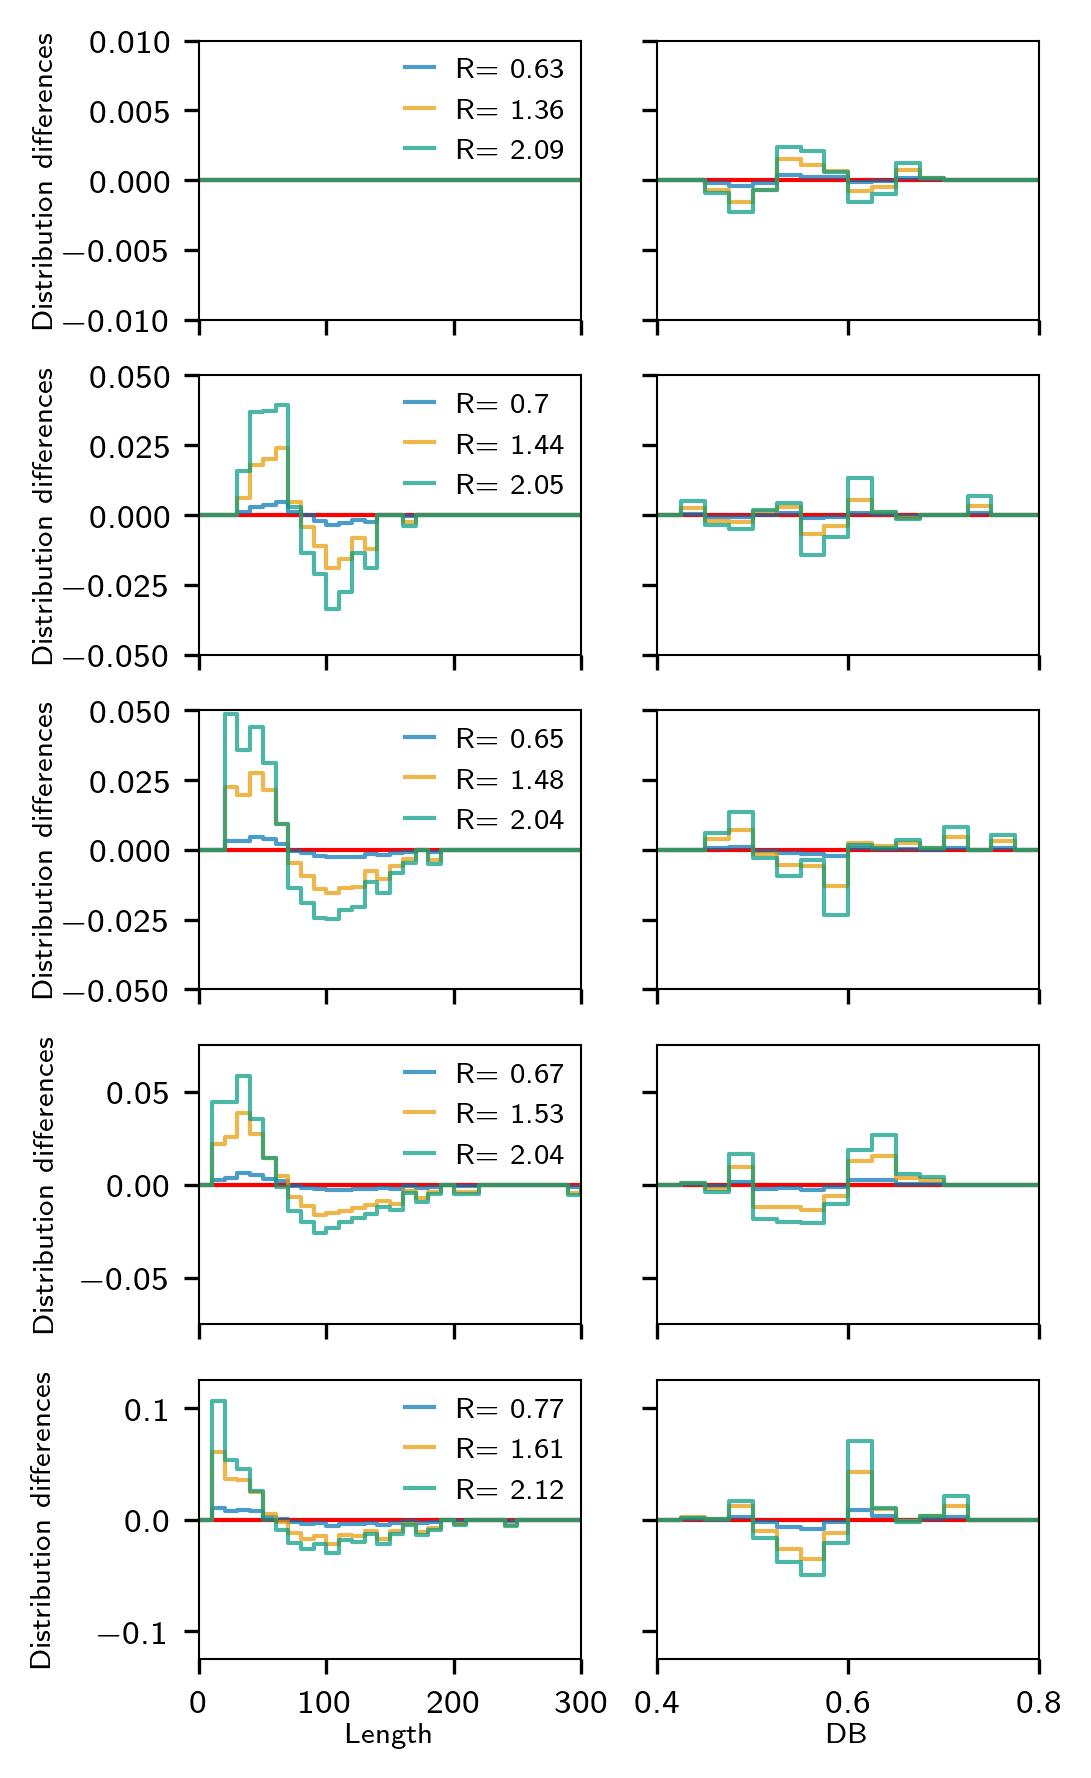

In [6]:
#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/0.6
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(5,2,  left=0.17 ,bottom=0.065, right=.97,top=.99)




alpha_pl_cl=0.3
alpha_cl=0.7

pl_cl=colors(alpha_pl_cl)
cl=colors(alpha_cl)

axes=[[],[],[],[],[]]
for i in range(0,5):
    for j in range(0,2):
        

        ax=plt.subplot(gs1[i,j])

        axes[i].append(ax)

dw_chosen=[1.0,1.1,1.2,1.3,1.4]
batch_chosen=[1,2,3,4]

bins_db=np.arange(0.4,0.85,0.025)
bins_len=np.arange(0,350,10)



phi_cut=0.5
redline_x=np.linspace(0,350,10)
redline_y=np.zeros(len(redline_x))
for i in range(0,len(axes)):
     
    for j in range(0,2):   
        
        axes[i][j].plot(redline_x,redline_y,c='red')
        
        
for i in range(0,len(dw_chosen)):
    
    dw=dw_chosen[i]
    ax0=axes[i][0]
    ax1=axes[i][1]

    fil_det=filesbatchdet[dws_shifts==dw]
    fil_rad=filesbatchx[dws_shifts==dw]
    shifts=shifts_det[dws_shifts==dw]


    rr_res,ene,shi_cases,volume= size_dis(fil_det,fil_rad,shifts,phi_cut) #Extract radius of micelle and corresponding energy given shi* folders


    enemin_ind=np.argmin(ene)
    
    ind1=np.argmax(ene[:enemin_ind])
    ind2=enemin_ind
    ind3=np.argmax(ene)
    
    chosen_ind=[ind1,ind2,ind3] #Case for critical micelle, energy min micelle and max radius micelle
    
    dbs_shifts=[]
    len_shifts=[]
    print(dw)

    for j in range(0,len(chosen_ind)):
        ind=chosen_ind[j]
        shi_val=shi_cases[ind]
        rr_val=rr_res[ind]
        
        filename=filesbatchtopo[(dws_batch==dw) & (shifts_nums==shi_val)][0] #Grabbing dw & shi_val case
        
        molecule_data=read_molecule_data_into_columns(filename)
        dbs=calculate_distribution(molecule_data)
        lengths=calculate_length_distribution(molecule_data)

        dbs_shifts.append(dbs)
        len_shifts.append(lengths)

        fil=filesbatchoriweights[(dws_batch==dw) & (shifts_nums==shi_val)][0]
        weights_ori=np.loadtxt(fil)

        fil=filesbatchmicweights[(dws_batch==dw) & (shifts_nums==shi_val)][0]
        weights_mic=np.loadtxt(fil)
    
        lab="R= "+str(round(rr_val,2))
        n, bins, patches = ax0.hist(lengths, bins=bins_len, alpha=0,weights=weights_mic-weights_ori)  # Alpha=0 makes bars invisible
        ax0.step(bins[:-1], n, where='post', color=cl[j],label=lab)

        n, bins, patches = ax1.hist(dbs, bins=bins_db, alpha=0,weights=weights_mic-weights_ori)  # Alpha=0 makes bars invisible
        ax1.step(bins[:-1], n, where='post', color=cl[j])
                    





for i in range(0,len(axes)):
    axes[i][0].set_ylabel("Distribution differences",labelpad=1.0)

    for label in axes[i][1].get_yticklabels():
        label.set_visible(False) 
        
    axes[i][0].set_xlim(0,300)
    axes[i][1].set_xlim(0.4,0.8)
  
    for j in range(0,2):   
        
        if i<len(axes)-1:
            for label in axes[i][j].get_xticklabels():
                label.set_visible(False)  
#         if i==0:
#             ax_titl= "PDI = "+ str(dw_chosen[j]) 
#         else:
#             ax_titl= "PDI = "+ str(dw_chosen[3+j]) 

#         titl = r"$\underline{\mathrm{ DB}}$"
        
#         if i==1:
#             axes[i][j].set_xlabel("Length",labelpad=1.0)
#             axes[i][j].set_xticks(np.arange(0.4,1.0,0.2))

#             axes[i][j].set_xlim(0.4,0.8)
 
#         if j==0:
#             axes[i][j].set_ylabel("Probability distribution",labelpad=1.0)
            
#         axes[i][j].set_title(ax_titl,pad=1.0)

                
axes[len(axes)-1][0].set_xlabel("Length",labelpad=1.0)
axes[len(axes)-1][1].set_xlabel("DB",labelpad=1.0)
axes[len(axes)-1][0].set_ylabel("Distribution differences",labelpad=10.0)
axes[len(axes)-2][0].set_ylabel("Distribution differences",labelpad=5.0)

for j in range(0,2):
    axes[0][j].set_ylim(-0.01,0.01)
    axes[1][j].set_ylim(-0.05,0.05)
    axes[2][j].set_ylim(-0.05,0.05)
    axes[3][j].set_ylim(-0.075,0.075)
    axes[4][j].set_ylim(-0.125,0.125)
      
       
        
for i in range(0,5):
    axes[i][0].legend(frameon=False,loc='center',bbox_to_anchor=(0.75, 0.75),handlelength=1, ncol=1)
       
        

plt.savefig("Supp_figures/distributions_shifts.pdf")

# Fig S3 - XY densities for two molecules in aspherical micelle

In [7]:
def read_molecule_data_into_columns(filename):
    molecules = {}  # Dictionary to hold data for each molecule
    
    current_molecule = None
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        
        for row in reader:
            # Strip any leading/trailing whitespace
            row = [r.strip() for r in row]
            
            if not row:  # Skip empty lines
                continue

            if row[0].startswith("Mol-"):  # Detect molecule entry (e.g., Mol-1, Mol-2)
                current_molecule = row[0]
                # Initialize 9 empty lists (one for each column)
                molecules[current_molecule] = {i: [] for i in range(9)}
            elif current_molecule is not None and len(row) >= 9:  # Ensure the row has at least 9 entries
                # Convert entries to integers and append them to the respective column
                try:
                    row_data = list(map(int, row[:9]))  # Only consider the first 9 columns
                    for i, val in enumerate(row_data):
                        molecules[current_molecule][i].append(val)  # Append to the appropriate column
                except ValueError:
                    continue  # If there's a conversion error, skip the row

    return molecules


def calculate_length_distribution(molecule_data):
    
    
    lengths=[]
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0] #removing linear segment
        tot_length=sum(data[1])-linear_seg_len
        lengths.append(tot_length)
    
    return np.array(lengths)
    
        
data='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/analysis/hyperbranched_data/topology_data.dat'

molecule_data=read_molecule_data_into_columns(data)
lengths=calculate_length_distribution(molecule_data)

# print(np.argmin(lengths)+1)
# print(np.min(lengths))

# print(np.argmax(lengths)+1)
# print(np.max(lengths))
# print(np.average(lengths))
for i in range(0,len(lengths)):
    print("Mol-"+str(i+1)+" - "+str(lengths[i]))

Mol-1 - 23
Mol-2 - 42
Mol-3 - 81
Mol-4 - 80
Mol-5 - 106
Mol-6 - 28
Mol-7 - 21
Mol-8 - 104
Mol-9 - 107
Mol-10 - 85
Mol-11 - 39
Mol-12 - 43
Mol-13 - 176
Mol-14 - 71
Mol-15 - 43
Mol-16 - 87
Mol-17 - 89
Mol-18 - 77
Mol-19 - 50
Mol-20 - 40
Mol-21 - 15
Mol-22 - 187
Mol-23 - 83
Mol-24 - 30
Mol-25 - 36
Mol-26 - 33
Mol-27 - 59
Mol-28 - 92
Mol-29 - 46
Mol-30 - 81
Mol-31 - 57
Mol-32 - 134
Mol-33 - 53
Mol-34 - 65
Mol-35 - 24
Mol-36 - 90
Mol-37 - 62
Mol-38 - 41
Mol-39 - 47
Mol-40 - 78
Mol-41 - 93
Mol-42 - 71
Mol-43 - 56
Mol-44 - 155
Mol-45 - 75
Mol-46 - 107
Mol-47 - 14
Mol-48 - 98
Mol-49 - 129
Mol-50 - 11
Mol-51 - 112
Mol-52 - 100
Mol-53 - 52
Mol-54 - 97
Mol-55 - 65
Mol-56 - 46
Mol-57 - 52
Mol-58 - 96
Mol-59 - 72
Mol-60 - 69
Mol-61 - 49
Mol-62 - 120
Mol-63 - 104
Mol-64 - 58
Mol-65 - 33
Mol-66 - 26
Mol-67 - 141
Mol-68 - 93
Mol-69 - 83
Mol-70 - 114
Mol-71 - 92
Mol-72 - 118
Mol-73 - 30
Mol-74 - 61
Mol-75 - 53
Mol-76 - 85
Mol-77 - 122
Mol-78 - 67
Mol-79 - 181
Mol-80 - 30
Mol-81 - 109
Mol-82 - 19
Mol-83

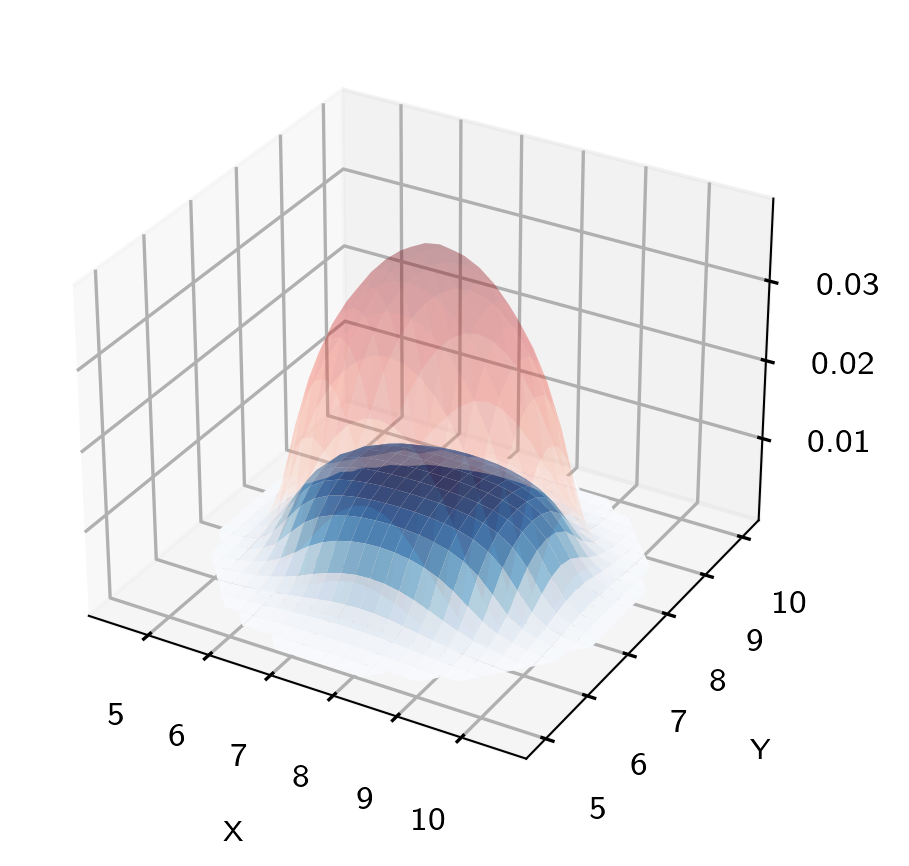

In [8]:

#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.2
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=5,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(1,1,  left=0.0, bottom=0.1, right=.85, top=0.99,hspace=0.15 )

# ax0=plt.subplot(gs1[0,0])
# ax1=plt.subplot(gs1[1,0])



grid_pts=64

nam_long='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/stretch_runs/asp_ratio_2.4/analysis/dens_xy/xy_dens_iter_mol_id_105.dat'
nam_short='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/stretch_runs/asp_ratio_2.4/analysis/dens_xy/xy_dens_iter_mol_id_1.dat'

data_long=np.loadtxt(nam_long)
data_short=np.loadtxt(nam_short)

x=data_long[:,0]
y=data_long[:,1]

v1_long=data_long[:,2]
v1_short=data_short[:,2]

# v1_long/=np.sum(v1_long)
# v1_short/=np.sum(v1_short)

threshold=0.0001

pts=v1_short<=threshold

x[pts]=np.nan
y[pts]=np.nan
v1_long[pts]=np.nan
v1_short[pts]=np.nan



x_new = x.reshape(grid_pts, grid_pts)
y_new = y.reshape(grid_pts, grid_pts)

v1_long_new = v1_long.reshape(grid_pts, grid_pts)
# v1_first_new=v1_first_new/np.sum(v1_first_new)
v1_short_new = v1_short.reshape(grid_pts, grid_pts)
# v1_second_new=v1_second_new/np.sum(v1_second_new)




output = plt.subplot(gs1[0,0], projection = '3d')   # 3d projection
output.plot_surface(x_new, y_new, v1_long_new, rstride = 1,cstride = 1, color = 'blue',cmap='Blues',alpha=1,linewidth=0, antialiased=True)
output.plot_surface(x_new, y_new, v1_short_new, rstride = 1, cstride = 1, color='red',cmap='Reds',alpha=0.2,linewidth=0, antialiased=True)
output.set_xlabel('X')                         # axis label
output.set_ylabel('Y')
output.set_zlabel('Solvophobic XY-density',labelpad=5.0)
# output.w_zaxis.label.set_rotation(120)  # Rotate z-axis label to be vertical
plt.savefig("Supp_figures/xy_dens.pdf")

# Fig S3 - X and Y normalised volume fractions for two molecules in aspherical micelle with PDI=1.4 and asp_ratio=2.4

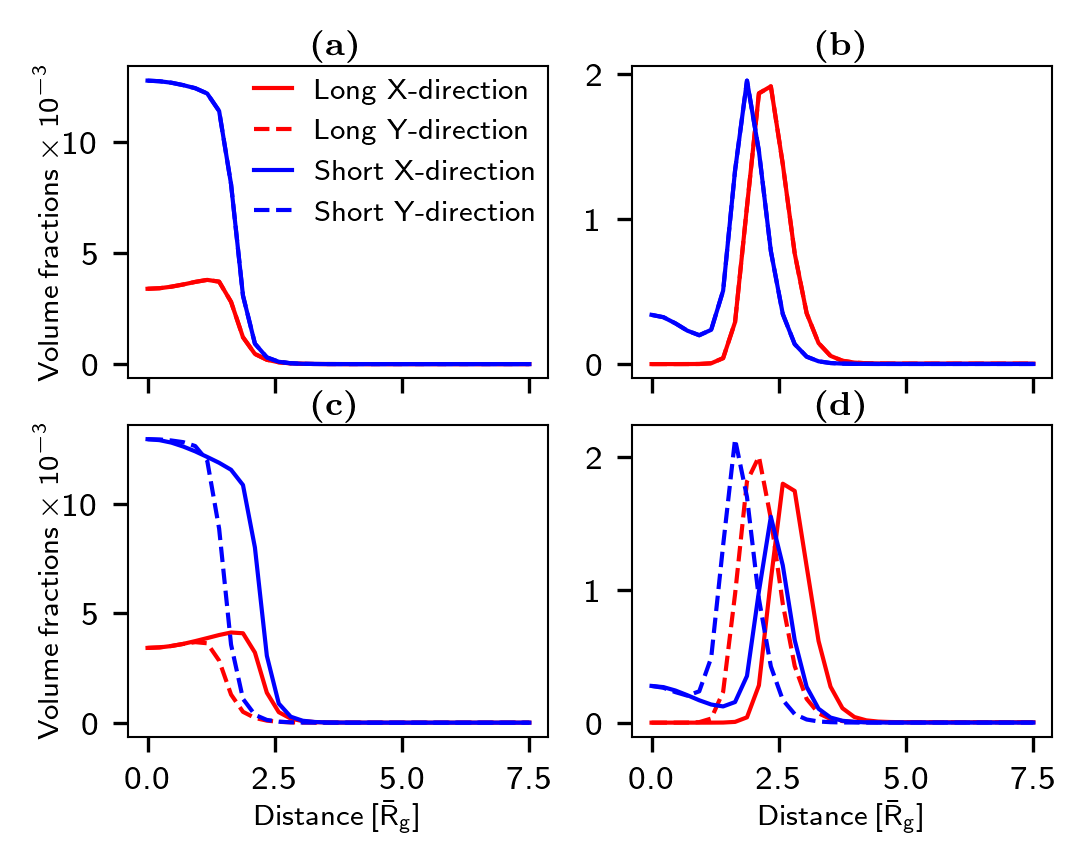

In [27]:
def volume_integral(rad, vol,cutoff):
    
    sorted_indices = np.argsort(rad)
    rad = rad[sorted_indices]
    vol = vol[sorted_indices]
    
    vol=vol[rad<=cutoff]
    rad=rad[rad<=cutoff]
    
    integrand = rad**2 * vol  
    integral = scipy.integrate.simpson(integrand, rad)
    result = 4 * np.pi * integral
    
    return result

def plot_graph(nam_short,nam_long,ax0,ax1):


    data_long=np.loadtxt(nam_long)
    data_short=np.loadtxt(nam_short)

    x=data_long[:,0]
    y=data_long[:,1]

    v1_long_x=data_long[:,2]
    v1_long_y=data_long[:,4]
    v2_long_x=data_long[:,3]
    v2_long_y=data_long[:,5]

    v1_short_x=data_short[:,2]
    v1_short_y=data_short[:,4]
    v2_short_x=data_short[:,3]
    v2_short_y=data_short[:,5]

    norm=1e3
    label='Long X-direction'
    # norm=volume_integral(x,v1_long_x,cutoff)
    ax0.plot(x,v1_long_x*norm,linestyle='-',c='red',label=label)
    ax1.plot(x,v2_long_x*norm,linestyle='-',c='red',label=label)

    label='Long Y-direction'
    # norm=volume_integral(y,v1_long_y,cutoff)
    ax0.plot(y,v1_long_y*norm,linestyle='--',c='red',label=label)
    ax1.plot(y,v2_long_y*norm,linestyle='--',c='red',label=label)

    label='Short X-direction'
    # norm=volume_integral(x,v1_short_x,cutoff)
    ax0.plot(x,v1_short_x*norm,linestyle='-',c='blue',label=label)
    ax1.plot(x,v2_short_x*norm,linestyle='-',c='blue',label=label)

    label='Short Y-direction'
    # norm=volume_integral(y,v1_short_y,cutoff)
    ax0.plot(y,v1_short_y*norm,linestyle='--',c='blue',label=label)
    ax1.plot(y,v2_short_y*norm,linestyle='--',c='blue',label=label)


#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.3
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(2,2,  left=0.1, bottom=0.12, right=.98, top=0.95 ,wspace=0.2,hspace=0.15)

ax00=plt.subplot(gs1[0,0])
ax01=plt.subplot(gs1[0,1])
ax10=plt.subplot(gs1[1,0])
ax11=plt.subplot(gs1[1,1])


nam_long_sph='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/stretch_runs/asp_ratio_1.0/analysis/volume_fractions_x_and_y/mol_id_105.dat'
nam_short_sph='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/stretch_runs/asp_ratio_1.0/analysis/volume_fractions_x_and_y/mol_id_1.dat'
plot_graph(nam_short_sph,nam_long_sph,ax00,ax01)

nam_long_asph='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/stretch_runs/asp_ratio_2.4/analysis/volume_fractions_x_and_y/mol_id_105.dat'
nam_short_asph='../results/micelles/LHBC/dw_1.4/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_0.00140/stretch_runs/asp_ratio_2.4/analysis/volume_fractions_x_and_y/mol_id_1.dat'
plot_graph(nam_short_asph,nam_long_asph,ax10,ax11)



ax10.set_xlabel(r'$\mathrm{Distance \, [\bar{R}_{g}]}$',labelpad=1.0)
ax11.set_xlabel(r'$\mathrm{Distance \, [\bar{R}_{g}]}$',labelpad=1.0)

ax00.set_ylabel(r"$\mathrm{Volume \, fractions \times 10^{-3}} $",labelpad=1.0)
ax10.set_ylabel(r"$\mathrm{Volume \, fractions \times 10^{-3}} $",labelpad=1.0)

fig.text(0.275,0.975,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.755,0.975,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')

fig.text(0.275,0.53,r'\bf{(c) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.755,0.53,r'\bf{(d) }', horizontalalignment='left', verticalalignment='center')
for label in ax00.get_xticklabels():
    label.set_visible(False) 
for label in ax01.get_xticklabels():
    label.set_visible(False) 
ax00.legend(frameon=False,loc='center',bbox_to_anchor=(0.635, 0.725),handlelength=1.3, ncol=1)

plt.savefig("Supp_figures/xy_aspherical_comparison.pdf")

# Fig S4 - CMCS of LHBC ,LDBC and linear for Sphere, Cylindrical and Lamallae with Encapsulation

In [9]:
import matplotlib.patches as patches


pt1d= '../results/micelles/LHBC/dw_*/enc*/SCF_runs_1d/phi_runs/all_details.dat'
pt2d= '../results/micelles/LHBC/dw_*/enc*/SCF_runs_2d/phi_runs/all_details.dat'
pt3d= '../results/micelles/LHBC/dw_*/enc*/SCF_runs_3d/phi_runs/all_details.dat'


files1d = np.array(glob.glob(pt1d))
files2d = np.array(glob.glob(pt2d))
files3d = np.array(glob.glob(pt3d))


dws1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d])
dws2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d])
dws3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d])



pt1d_ldbc= '../results/micelles/LDBC/gen*/enc*/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_ldbc= '../results/micelles/LDBC/gen*/enc*/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_ldbc= '../results/micelles/LDBC/gen*/enc*/SCF_runs_3d/phi_runs/all_details.dat'


files1d_ldbc = np.array(glob.glob(pt1d_ldbc))
files2d_ldbc = np.array(glob.glob(pt2d_ldbc))
files3d_ldbc = np.array(glob.glob(pt3d_ldbc))


gen1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d_ldbc])
gen2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d_ldbc])
gen3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d_ldbc])


gen_num=len(np.unique(gen3d))




pt1d_linear= '../results/micelles/linear/enc*/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_linear= '../results/micelles/linear/enc*/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_linear= '../results/micelles/linear/enc*/SCF_runs_3d/phi_runs/all_details.dat'


files1d_linear = np.array(glob.glob(pt1d_linear))
files2d_linear = np.array(glob.glob(pt2d_linear))
files3d_linear = np.array(glob.glob(pt3d_linear))



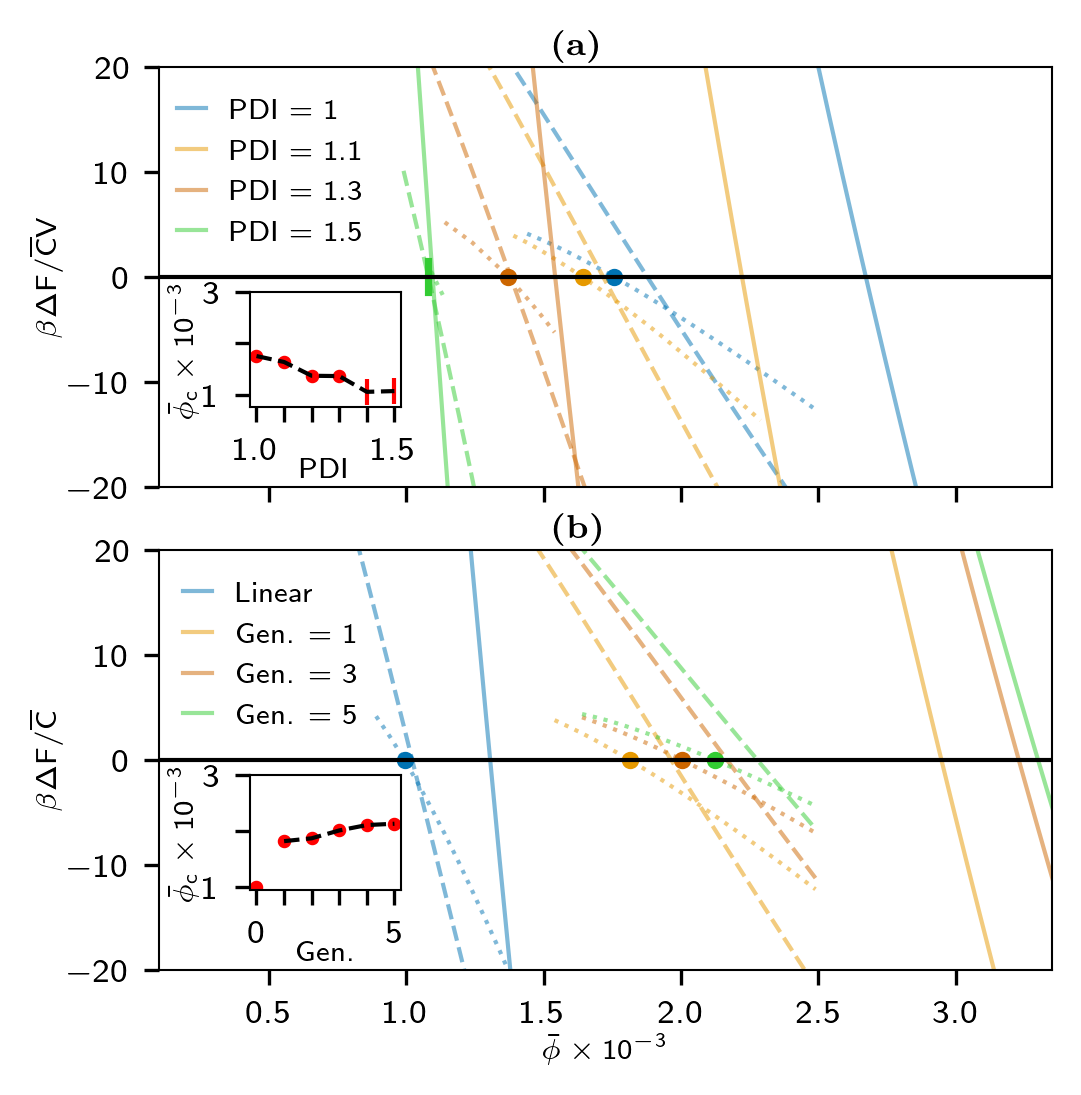

In [10]:

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions
 

def unionarrays(arrays):
    result = arrays[0]  # Start with the first array
    for array in arrays[1:]:
        result = np.union1d(result, array)  # Union of the current result with the next array
    return result


#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(2,1,  left=0.125, bottom=0.1, right=.975, top=.96,hspace=0.15 )

ax0=plt.subplot(gs1[0,0])
ax1=plt.subplot(gs1[1,0])

pl_cl=colors(0.5)
cl=colors(1)


phihomo=1e-5





phibarss=[]
types=[] # 0 =vesicle 1=cylinder 2=sphere

mult=1e3
mult_phi=1e3

xlow=0.1e-3*mult_phi
xhigh=3.35e-3*mult_phi
ylow=-20
yhigh=20

#LHBC
symbols=['o','^','o'] 
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
dw_chosen=[1,1.1,1.2,1.3,1.4,1.5]
dw_plot=np.array([1,1.1,1.3,1.5])
sym_siz=[5,5,5]

for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    inter_pts_means=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d
            dws=dws1d
        if p==1:
            files=files2d
            dws=dws2d
            
        if p==2:
            files=files3d
            dws=dws3d
        
        inter_full=[]
        edif_full=[]  
        phis_full=[]
        



        fil=files[(dws==dw_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        phibar=dat[:,16]-phihomo
        volume=dat[:,9]
        edif=dat[:,17]*volume
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]


        inter_pt=inverse_interp(phibar[stat==0],edif[stat==0],0)[-1]

        inter_pts_means.append(inter_pt)


        edif[stat!=0]=np.nan #simulation that didnt converge coreectly are not accounted in the mean and std calc
        phibar[stat!=0]=np.nan
      

        lab="PDI = "+str(dw_chosen[i])

        if np.isin(dw_chosen[i],dw_plot):
            if p==0:
                ax0.plot(phibar*mult_phi,np.array(edif),linestyle=linstyl[p],c=pl_cl[i],label=lab)
            else:
                ax0.plot(phibar*mult_phi,np.array(edif),linestyle=linstyl[p],c=pl_cl[i])




    
    pt=np.argmin(np.array(inter_pts_means))
    
    phibarss.append(inter_pts_means[pt])
    types.append(pt)
        
    x=[inter_pts_means[pt]]
    y=0
    if np.isin(dw_chosen[i],dw_plot):
        if pt==2:
            ax0.scatter(x[0]*mult_phi,y,marker='o',s=10,facecolors=cl[i], edgecolors=cl[i])  
        elif pt ==1 :
            rect = patches.Rectangle( ((x[0]*mult_phi-xlow)/(xhigh-xlow)-0.0015, 0.5-0.04),0.003,0.08,edgecolor=cl[i],facecolor=cl[i],transform=ax0.transAxes)
            ax0.add_patch(rect)
        else:
            ax0.scatter(x[0],y,marker=symbols[pt],c=cl[i],s=10,facecolors='None')  
    
#Linear

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d


inter_full=[]

for p in range(0,3): #looping over geometries
    if p==0:
        files=files1d_linear
    if p==1:
        files=files2d_linear
    if p==2:
        files=files3d_linear


    edif_full=[]  
    phis_full=[]


    fil=files[0]
    dat=np.loadtxt(fil,skiprows=0)
    phibar=dat[:,16]-phihomo
    volume=dat[:,9]
    edif=dat[:,17]*volume
    stat=dat[:,0]

    phibar=phibar[abs(edif)>=1e-5]
    stat=stat[abs(edif)>=1e-5]
    edif=edif[abs(edif)>=1e-5]

    phibar=phibar[stat==0]
    edif=edif[stat==0]

    inter_pt=inverse_interp(phibar,edif,0)[-1]
    inter_full.append(inter_pt)


    if p==0:
        ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[0],label='Linear')

    else:
        ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[0])


pt=np.argmin(np.array(inter_full))
x=[inter_full[pt]]

phibarss.append(inter_full[pt])
types.append(pt)

y=0
if pt==2:
    ax1.scatter(x[0]*mult_phi,y,marker='o',s=10,facecolors=cl[0], edgecolors=cl[0])  
elif pt ==1 :
    rect = patches.Rectangle( ((x[0]*mult_phi-xlow)/(xhigh-xlow)-0.0015, 0.5-0.04),0.003,0.08,edgecolor=cl[0],facecolor=cl[0],transform=ax1.transAxes)
    ax1.add_patch(rect)
else:
    ax1.scatter(x[0],y,marker=symbols[pt],c=cl[0],s=10,facecolors='None')      
    

#LDBC

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
gen_chosen=[1,2,3,4,5]
gen_plot=np.array([1,3,5])

for i in range(0,len(gen_chosen)):  #looping over PDIs
  

    inter_full=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d_ldbc
            gen=gen1d
        if p==1:
            files=files2d_ldbc
            gen=gen2d
        if p==2:
            files=files3d_ldbc
            gen=gen3d
          
        
        edif_full=[]  
        phis_full=[]
        
       
        fil=files[(gen==gen_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        phibar=dat[:,16]-phihomo
        volume=dat[:,9]
        edif=dat[:,17]*volume
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]

        phibar=phibar[stat==0]
        edif=edif[stat==0]
        inter_pt=inverse_interp(phibar,edif,0)[-1]
        inter_full.append(inter_pt)

        if np.isin(gen_chosen[i],gen_plot):
            if p==0:
                ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[i+1],label='Gen. = '+str(gen_chosen[i]))

            else:
                ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[i+1])
 

    pt=np.argmin(np.array(inter_full))
    x=[inter_full[pt]]
    y=0
    
    if np.isin(gen_chosen[i],gen_plot):
        if pt==2:
            ax1.scatter(x[0]*mult_phi,y,marker='o',s=10,facecolors=cl[i+1], edgecolors=cl[i+1])  
        elif pt ==1 :
            rect = patches.Rectangle( ((x[0]*mult_phi-xlow)/(xhigh-xlow)-0.0015, 0.5-0.04),0.003,0.08,edgecolor=cl[i+1],facecolor=cl[i+1],transform=ax1.transAxes)
            ax1.add_patch(rect)
        else:
            ax1.scatter(x[0],y,marker=symbols[pt],c=cl[i+1],s=10,facecolors='None')      
    
    phibarss.append(inter_full[pt])
    types.append(pt)





#Rest of plotting parameters    
zero_line=np.linspace(1e-4,1e-2,100)*mult_phi
edifzeros=np.zeros(len(zero_line))
ax1.plot(zero_line,edifzeros,c='black')   
ax0.plot(zero_line,edifzeros,c='black')   

ax1.set_xlabel(r"$\mathrm{\Bar{\phi}\times 10^{-3}}$",labelpad=1.0)
ax0.set_ylabel(r"$\mathrm{\beta\Delta F / \overline{C}  V}$",labelpad=1.0)
ax1.set_ylabel(r"$\mathrm{\beta\Delta F  / \overline{C}}$",labelpad=1.0)

# ax.set_xscale('log')
ax0.set_ylim(ylow,yhigh)
ax0.set_xlim(xlow,xhigh)
ax1.set_ylim(ylow,yhigh)
ax1.set_xlim(xlow,xhigh)

ax0.legend(frameon=False,loc='center',bbox_to_anchor=(0.125, 0.75),handlelength=1, ncol=1)
ax1.legend(frameon=False,loc='center',bbox_to_anchor=(0.125, 0.75),handlelength=1, ncol=1)

for label in ax0.get_xticklabels():
    label.set_visible(False)

    
#Inset axes
sym_siz=[5,5,5]

inset_axes0 = inset_axes(ax0,width="100%", height="100%", loc='upper left',
bbox_to_anchor=(0.085,1-0.775,.17,.275), bbox_transform=ax0.transAxes)

    
inset_axes0.plot(dw_chosen,np.array(phibarss[0:len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   

for i in range(0,len(dw_chosen)):
    
    pt=types[i]
    x=dw_chosen[i]
    y=phibarss[i]*mult_phi
    if pt==2:
        inset_axes0.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-0.25), 0.0001, 0.5,edgecolor='red',facecolor='red')
        inset_axes0.add_patch(rect)
        
inset_axes0.set_xticks(dw_chosen)
inset_axes0.set_xticklabels([1.0,"","","","",1.5])  # Empty x tick labels
inset_axes0.set_yticks([1,2,3]) 
inset_axes0.set_yticklabels([1,"",3])  # Empty x tick labels

inset_axes0.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0)
inset_axes0.set_xlabel(r"PDI",labelpad=-2.0) 



genss=[0]+gen_chosen

inset_axes1 = inset_axes(ax1,width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.085,1-0.775,.17,.275), bbox_transform=ax1.transAxes)

for i in range(len(dw_chosen),len(dw_chosen)+len(genss)):
    
    pt=types[i]
    x=genss[i-len(dw_chosen)]
    y=phibarss[i]*mult_phi
    if pt==2:
        inset_axes1.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-0.25), 0.0001, 0.5,edgecolor='red',facecolor='red')
        inset_axes1.add_patch(rect)
        
# inset_axes1.plot(genss,np.array(phibarss[len(dw_chosen):])*mult_phi,linestyle='--',c='black',markersize=1)   
inset_axes1.plot(genss[0],np.array(phibarss[len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   
inset_axes1.plot(genss[1:],np.array(phibarss[len(dw_chosen)+1:])*mult_phi,linestyle='--',c='black',markersize=1)   

inset_axes1.set_xticks(genss)
inset_axes1.set_xticklabels([0,"","","","",5])  # Empty x tick labels
inset_axes1.set_yticks([1,2,3]) 
inset_axes1.set_yticklabels([1,"",3])  # Empty x tick labels

inset_axes1.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0)
inset_axes1.set_xlabel(r"Gen.",labelpad=-2.0)




fig.text(0.5,0.98,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.5,0.52,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')



plt.savefig("Supp_figures/phibar_vs_edif_encaps.pdf")

# FIG S5 - Radii of encapsulated and non-encapsulated micelles

In [11]:
def inverse_interp(x, y, y_given):
    solutions=[]
  
    for i in range(1,len(y)):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions

def return_radii(fil,phicut):
    
    data_prof=np.loadtxt(fil)
    rr_prof=data_prof[:,0]
    vol1=data_prof[:,1]
 
    vol1=vol1[rr_prof>=-0.001]
    rr_prof=rr_prof[rr_prof>=-0.001]
    
    radii=inverse_interp(rr_prof,vol1,phicut)
    
    return radii

lhbc_no_enc = '../results/micelles/LHBC/dw_*/*3d/batch_1/p*/c*/p*/data/x*'
lhbc_enc = '../results/micelles/LHBC/dw_*/encaps*/*3d/p*/c*/p*/data/x*'

ldbc_no_enc = '../results/micelles/LDBC/gen*/*3d/p*/c*/p*/data/x*'
ldbc_enc = '../results/micelles/LDBC/gen*/enc*/*3d/p*/c*/p*/data/x*'

linear_no_enc = '../results/micelles/linear/*3d/p*/c*/p*/data/x*'
linear_enc = '../results/micelles/linear/enc*/*3d/p*/c*/p*/data/x*'

fileslhbcnoenc = np.array(glob.glob(lhbc_no_enc))
fileslhbcenc = np.array(glob.glob(lhbc_enc))

filesldbcnoenc = np.array(glob.glob(ldbc_no_enc))
filesldbcenc = np.array(glob.glob(ldbc_enc))

fileslinearnoenc = np.array(glob.glob(linear_no_enc))
fileslinearenc = np.array(glob.glob(linear_enc))

dws_enc= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbcenc])
dws_no_enc= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbcnoenc])

gens= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesldbcnoenc])



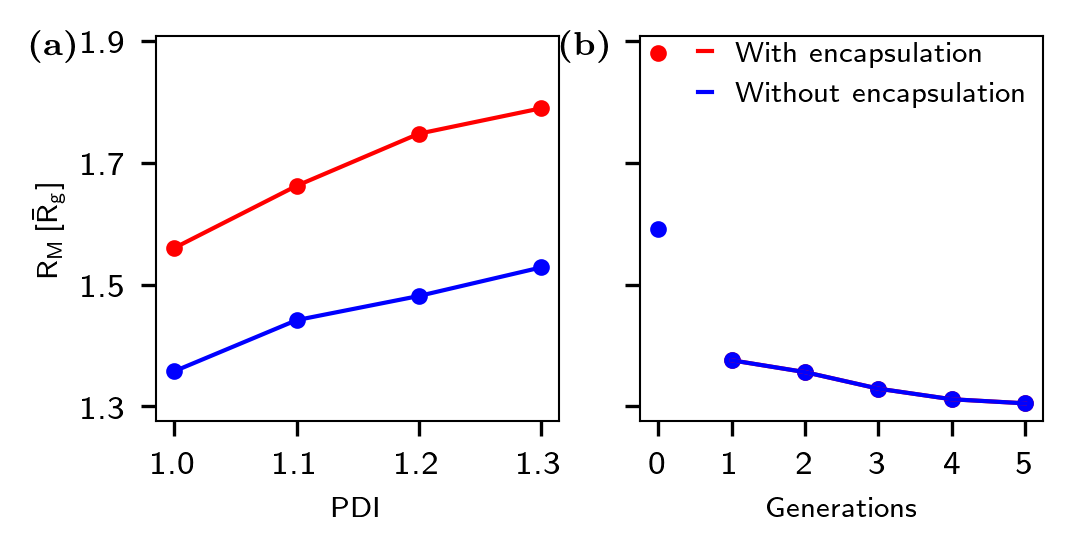

In [12]:
#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/2.1
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(1,2,  left=0.125 ,bottom=0.2, right=.97,top=.97)

ax0=plt.subplot(gs1[0,0])
ax1=plt.subplot(gs1[0,1],sharey=ax0)

# alpha_pl_cl=0.3
# alpha_pl_cl=0.3
# pl_cl=colors(alpha_pl_cl)
# cl=colors(alpha_cl)

dw_chosen=[1,1.1,1.2,1.3]
gen_chosen=[1,2,3,4,5]
phicut=0.5

#LHBCs
rr_res_no_enc=[]
rr_res_enc=[]

#LHBC
for i in range(0,len(dw_chosen)):
    
    dw=dw_chosen[i]

    fil=fileslhbcnoenc[(dws_no_enc==dw)][0]
    radii=return_radii(fil,phicut)
    if len(radii) >= 1: #Ignoring cases where convergent case is not micelle like
        rr_res_no_enc.append(radii[-1])

        
        
    fil=fileslhbcenc[(dws_enc==dw)][0]
    radii=return_radii(fil,phicut)

    if len(radii) >= 1: #Ignoring cases where convergent case is not micelle like
        rr_res_enc.append(radii[-1])

#Linear
fil=fileslinearnoenc[0]
radii=return_radii(fil,phicut)

if len(radii) >= 1: #Ignoring cases where convergent case is not micelle like
    rr_res_no_enc.append(radii[-1])

    
    
fil=fileslinearenc[0]
radii=return_radii(fil,phicut)

if len(radii) >= 1: #Ignoring cases where convergent case is not micelle like
    rr_res_enc.append(radii[-1])
    
    
    
    
#LDBC
for i in range(0,len(gen_chosen)):
    
    gen=gen_chosen[i]

    fil=filesldbcnoenc[(gens==gen)][0]
    radii=return_radii(fil,phicut)


    if len(radii) >= 1: #Ignoring cases where convergent case is not micelle like
        rr_res_no_enc.append(radii[-1])

    fil=filesldbcnoenc[(gens==gen)][0]
    radii=return_radii(fil,phicut)


    if len(radii) >= 1: #Ignoring cases where convergent case is not micelle like
        rr_res_enc.append(radii[-1])

        
genss=[0]+gen_chosen
lab="With encapsulation"
ax0.scatter(dw_chosen,rr_res_enc[:len(dw_chosen)],c='red')
ax0.plot(dw_chosen,rr_res_enc[:len(dw_chosen)],c='red',linestyle='-',label=lab)
lab="Without encapsulation"
ax0.scatter(dw_chosen,rr_res_no_enc[:len(dw_chosen)],c='blue')
ax0.plot(dw_chosen,rr_res_no_enc[:len(dw_chosen)],c='blue',linestyle='-',label=lab)
lab="With encapsulation"
ax1.scatter(genss,rr_res_enc[len(dw_chosen):],c='red')
ax1.plot(genss[1:],rr_res_enc[len(dw_chosen)+1:],c='red',linestyle='-',label=lab)
lab="Without encapsulation"
ax1.scatter(genss,rr_res_no_enc[len(dw_chosen):],c='blue')
ax1.plot(genss[1:],rr_res_no_enc[len(dw_chosen)+1:],c='blue',linestyle='-',label=lab)


ax0.set_xticks([1.0,1.1,1.2,1.3])
ax1.set_xticks([0,1,2,3,4,5])

ax0.set_yticks(np.arange(1.3,2.0,0.2))

for label in ax1.get_yticklabels():
    label.set_visible(False) 
        
ax0.set_xlabel('PDI')
ax1.set_xlabel('Generations')

ax0.set_ylabel(r'$\mathrm{R_{M}\, [\bar{R}_{g}]}$')

ax1.legend(frameon=False,loc='center',bbox_to_anchor=(0.55, 0.9),handlelength=0.5, ncol=1)

fig.text(0.005,0.95,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.51,0.95,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')
plt.savefig("Supp_figures/radii_enc_no_enc.pdf")